In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('netflix1.csv')
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.type.describe()

count      8790
unique        2
top       Movie
freq       6126
Name: type, dtype: object

In [5]:
India = df[df.country == 'India']

##### Different types of ratings allowed for children only

In [6]:
df.rating.unique()
children_ratings = ['TV-Y7', 'TV-Y', 'TV-G', 'G', 'TV-Y7-FV']
adult_ratings = ['TV-MA', 'R', 'NC-17']

In [7]:
child_movies = df[ (df.rating == 'TV-Y7') | (df.rating == 'TV-Y') | (df.rating == 'TV-G') | (df.rating == 'TV-Y7-FV') ]

Text(0.5, 1.0, 'Movies and show available for Children')

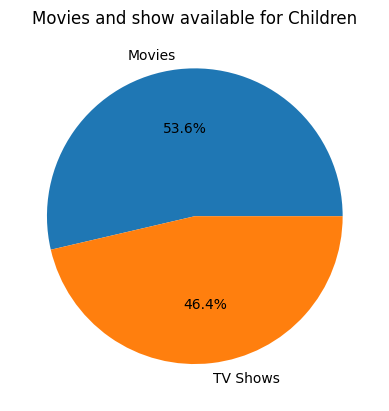

In [60]:
c = plt.pie(x=child_movies.type.value_counts().tolist(),labels=['Movies','TV Shows'], autopct='%.1f%%')
plt.title('Movies and show available for Children')

#### Movies allowed for adult viewers

In [9]:
adult_movies = df[ (df.rating == 'TV-MA') | (df.rating == 'R') | (df.rating == 'NC-17') ]

Text(0.5, 1.0, 'Movies and show available for Adults')

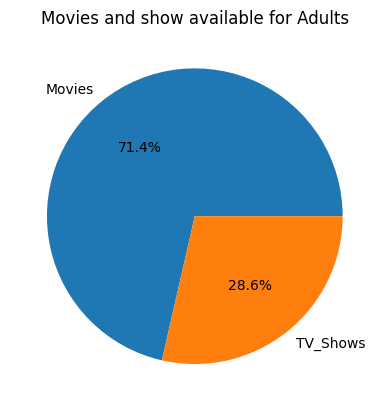

In [58]:
a = plt.pie(x=adult_movies.type.value_counts().tolist(),labels=['Movies','TV_Shows'], autopct='%.1f%%')
plt.title('Movies and show available for Adults')

##### Frequency of movies releasing every year

In [53]:
before_2000 = df[df.release_year <= 2000]
after_2000 = df[(df.release_year >= 2000)]

In [12]:
percent_1 = (before_2000.show_id.count()/df.show_id.count()) * 100
percent_1

6.39362912400455

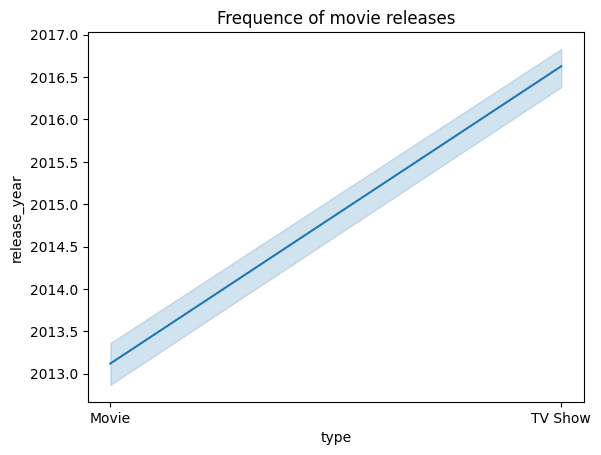

In [65]:
_ = sns.lineplot(data = df, y = 'release_year', x = 'type').set_title('Frequence of movie releases')

Text(0.5, 1.0, 'After 2000')

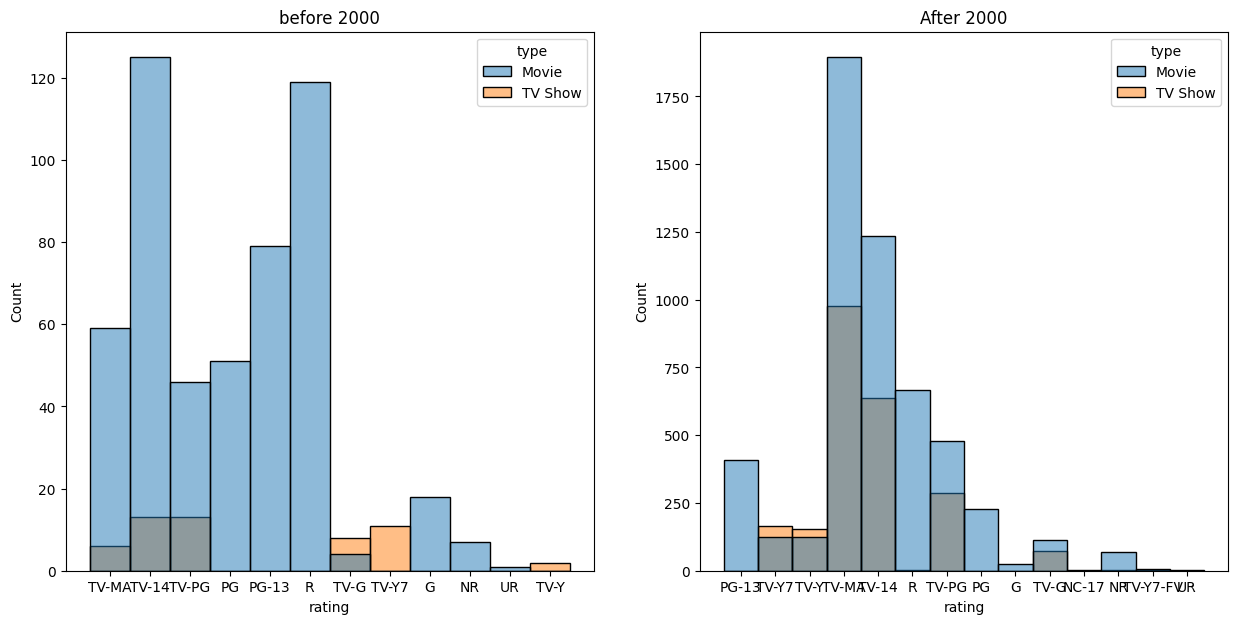

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7))
ax = sns.histplot(data=before_2000, x='rating',hue='type', ax=axes[0], kde=False)
ax.set_title('before 2000')

ax = sns.histplot(data=after_2000, x='rating',hue='type', ax=axes[1], kde=False)
ax.set_title('After 2000')

- Before 2000, Netflix was more focued to release movies only

Text(0.5, 1.0, 'Trend Before 2000')

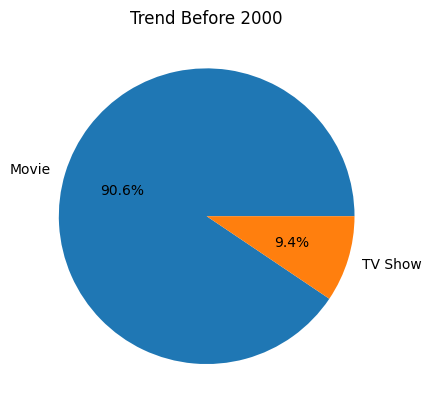

In [52]:
plt.pie(x= before_2000.type.value_counts().tolist(), labels=[i for i in before_2000.type.unique()], autopct='%.1f%%')
plt.title('Trend Before 2000')

- After 2000, Netflix has 1/3rd of their content in TV Show format

Text(0.5, 1.0, 'Trend After 2000')

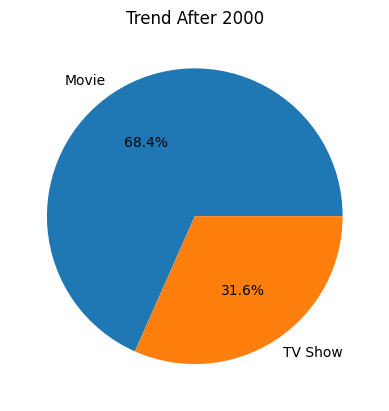

In [54]:
plt.pie(x=after_2000.type.value_counts().tolist(), labels=[i for i in after_2000.type.unique()], autopct='%.1f%%' )
plt.title('Trend After 2000')

- Percentage of Movies and shows netflix created for the Indian audience

Text(0.5, 1.0, 'Movies and TV percentage in India')

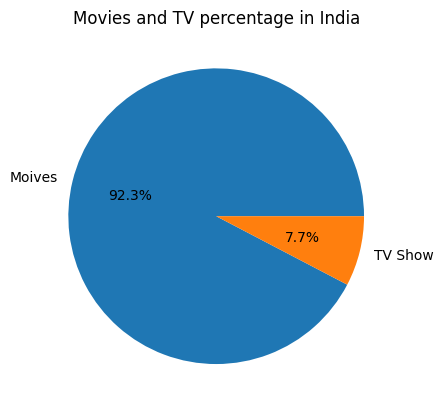

In [55]:
_ = plt.pie(x= India.type.value_counts().tolist(), labels=['Moives','TV Show'], autopct='%.1f%%')
plt.title('Movies and TV percentage in India')